In [37]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [38]:
df = pd.read_csv('karachi-weather-2021-2023.csv')

In [39]:
#Q1
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.index = pd.to_datetime(df.index)

weekly_mean = df.resample('W').mean()

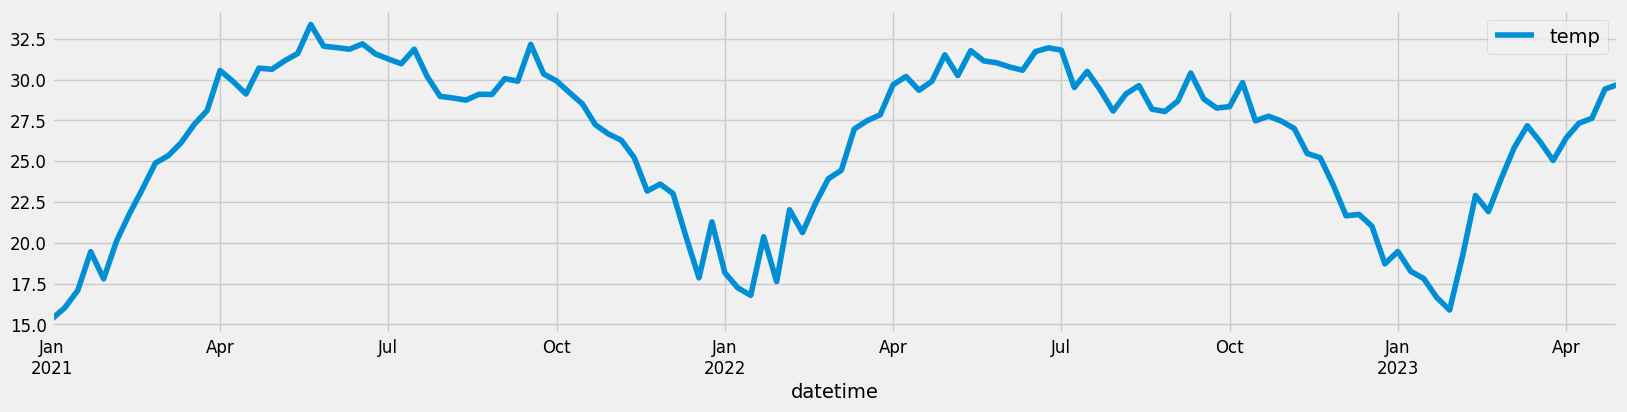

In [40]:
#Q2
weekly_mean.plot(figsize=(18, 4))
plt.show()


#### The graph shows the average fluctuations in the weekly temperature of Karachi from Jan'21 - Apr'23. The graph shows different peaks and troughs, showing how changing the Karachi's temperature is. One thing is sure that the temp is not constant January has the lowest temperature, while May and June record the highest temperatures. In conclusion, this graph shows us the temperature trends in Karachi from early 2021 to mid-2023.

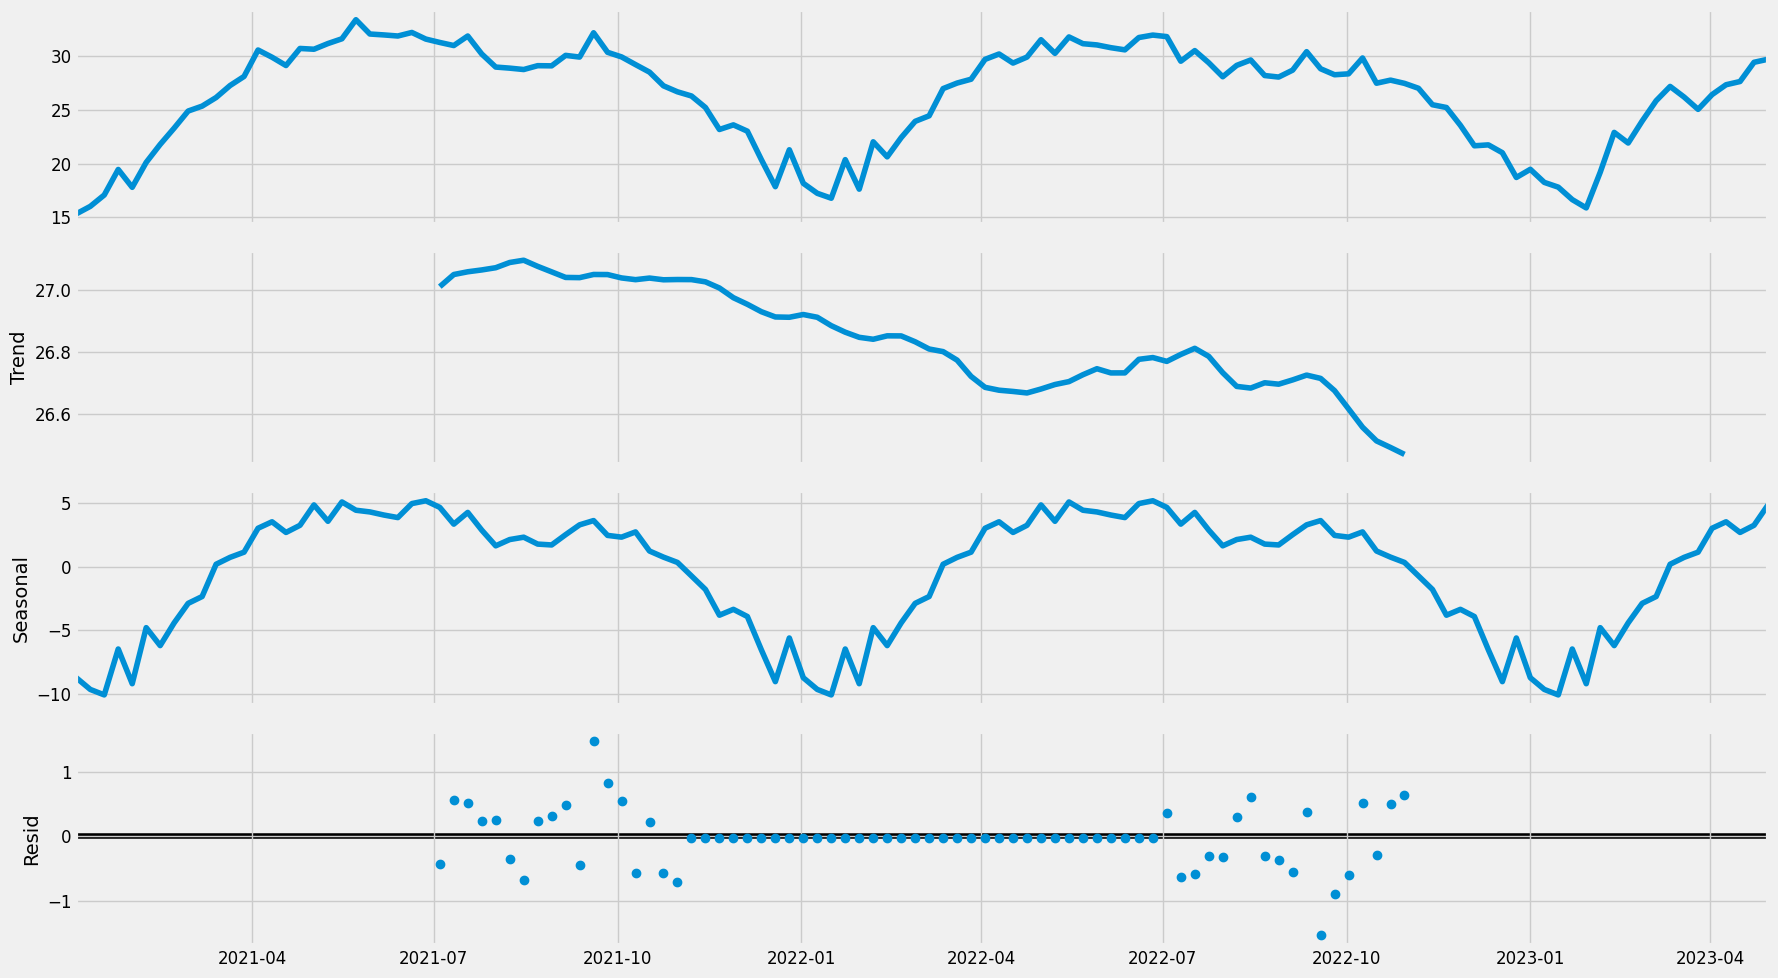

In [41]:
decomposition = sm.tsa.seasonal_decompose(weekly_mean, model='additive')
rcParams['figure.figsize'] = (18, 10)
fig = decomposition.plot()
plt.show()

#### The first graph focuses on the trend component, showing the main direction of temperature changes. It demonstrates a consistent downward trend, notably with a significant drop in temperatures after October 2022, indicating a continual decline over time. The second graph captures the seasonal temperature trends in Karachi. It shows higher temperatures in the middle of the year and lower temperatures at the beginning and end, with a pronounced dip in January. The third graph, representing the residual component, displays the unexplained variations in the temperature data that are not covered by the trend or seasonal patterns, offering us insights into the unpredictability and variability of temperature. It highlights anomalies or deviations from expected temperature patterns, which could be due to external factors like unusual weather events or errors in measurements.









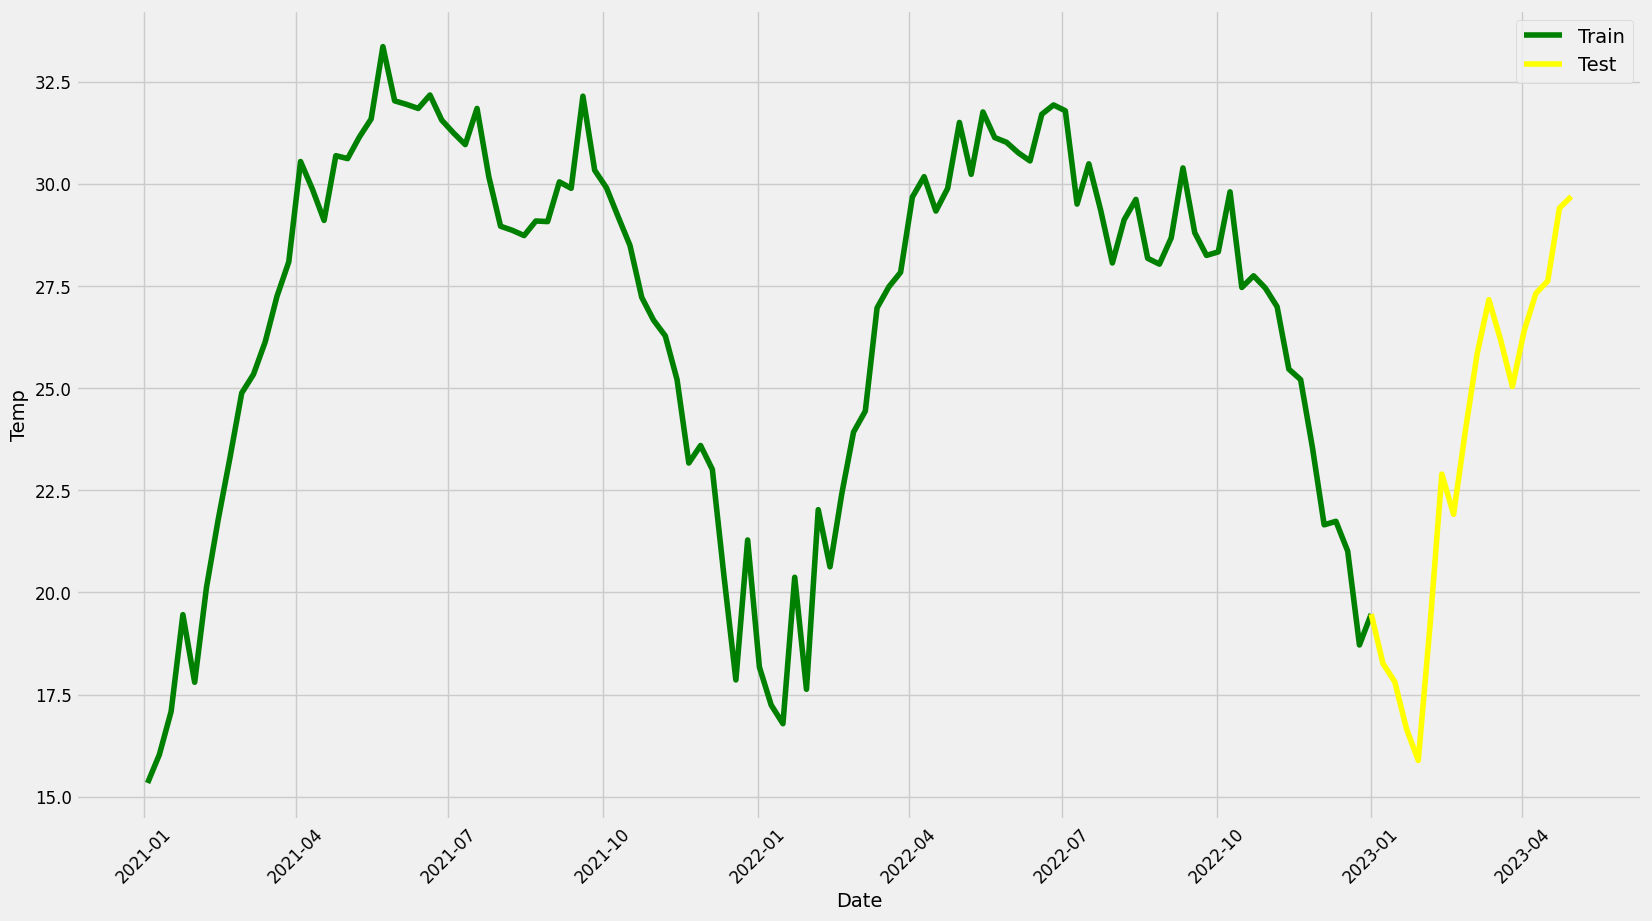

In [42]:
#Q3

train_set = weekly_mean[weekly_mean.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test_set = weekly_mean[weekly_mean.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(train_set, color = "green", label = 'Train')
plt.plot(test_set, color = "yellow", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()

#### In the depicted graph, the data has been divided into training and testing sets. The x-axis denotes the date, and the y-axis indicates the dependent variable, which in this case is temperature.

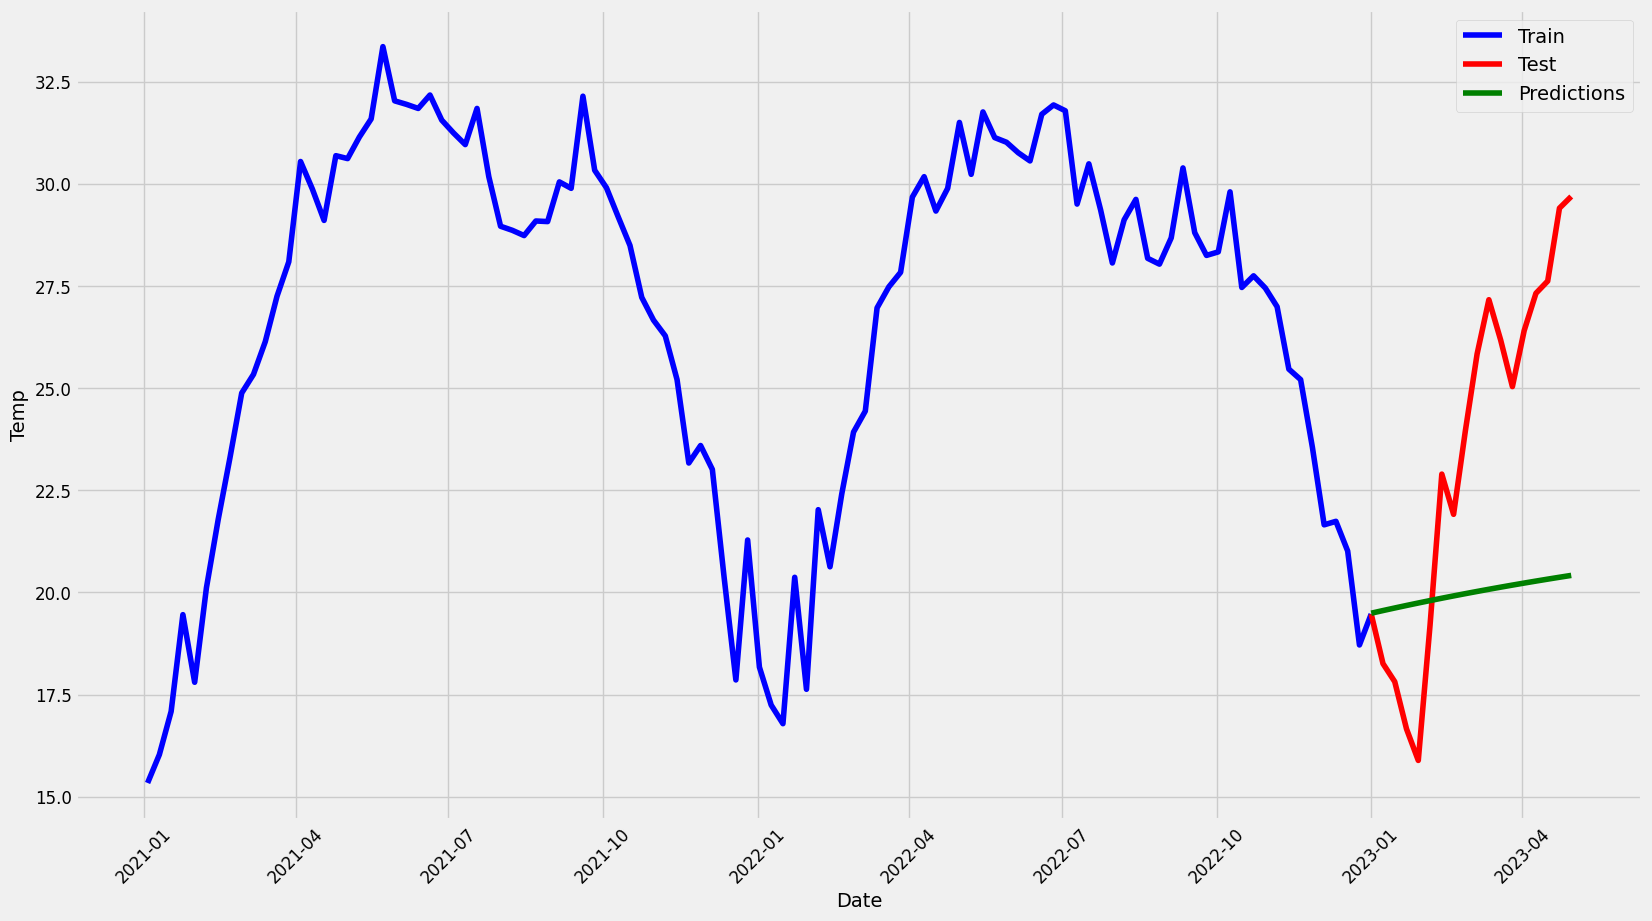

RMSE:  5.333699360957228


In [43]:
#Q4

ARIMAmodel = ARIMA(train_set, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [44]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -185.835
Date:                Mon, 11 Dec 2023   AIC                            379.669
Time:                        18:28:38   BIC                            390.285
Sample:                    01-03-2021   HQIC                           383.971
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4693      3.881      5.790      0.000      14.863      30.075
ar.L1          0.9783      0.024     39.979      0.000       0.930       1.026
ma.L1         -0.1032      0.089     -1.163      0.2

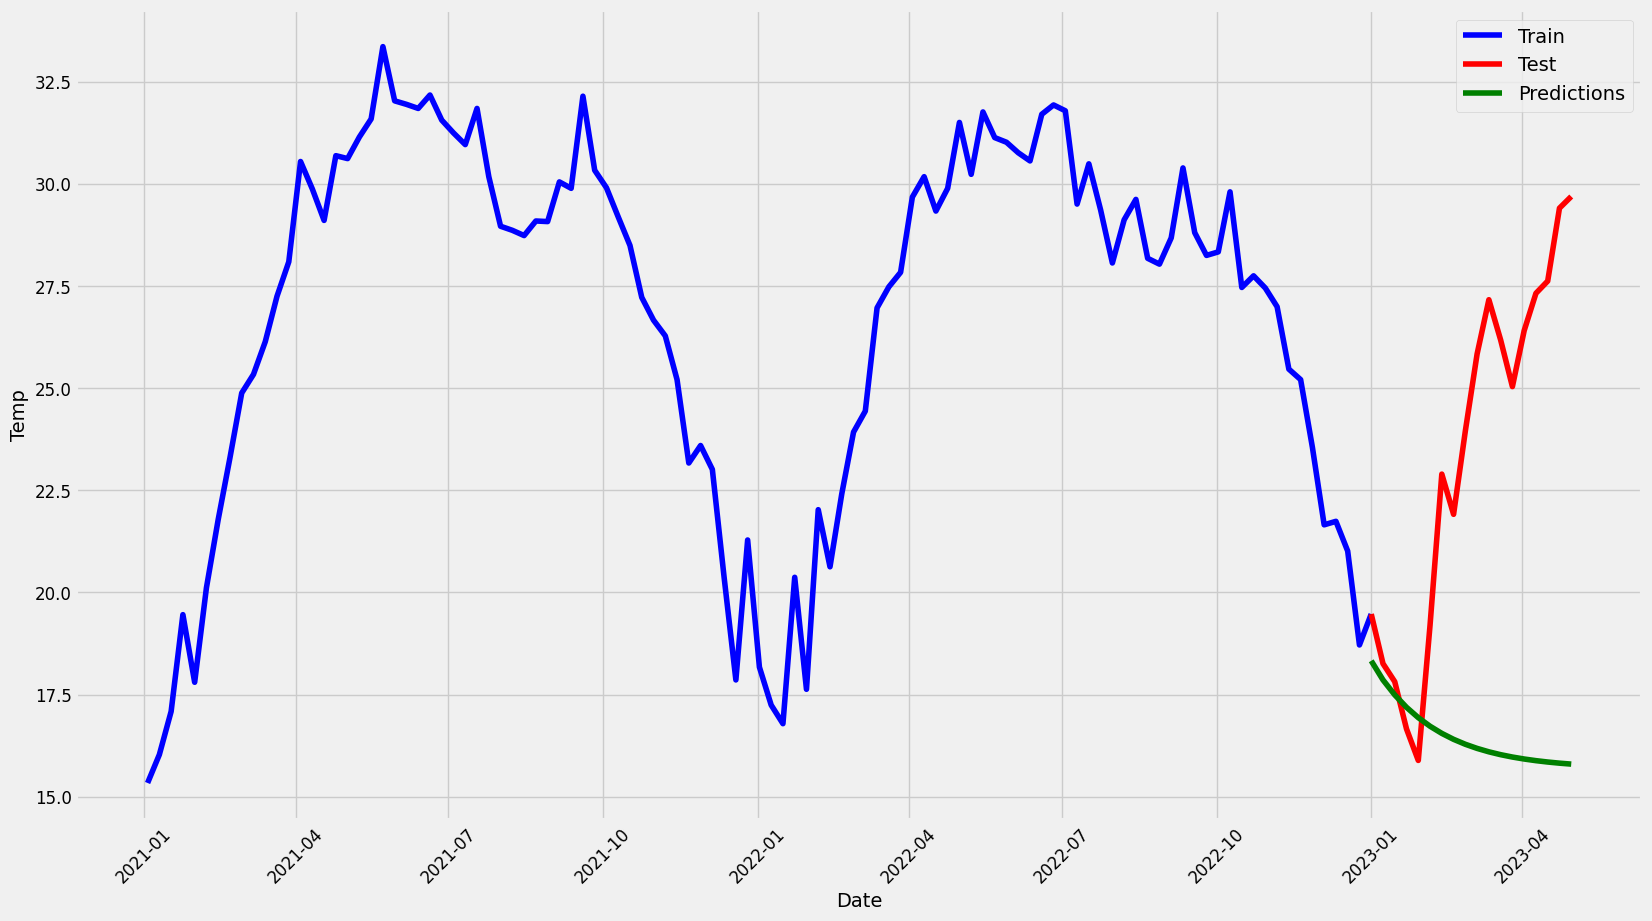

RMSE:  8.493304312615752


In [45]:
ARIMAmodel = ARIMA(train_set, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [46]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -168.978
Date:                Mon, 11 Dec 2023   AIC                            347.957
Time:                        18:28:39   BIC                            361.179
Sample:                    01-03-2021   HQIC                           353.314
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8786      0.199      4.426      0.000       0.489       1.268
ar.L2         -0.0388      0.205     -0.189      0.850      -0.440       0.362
ma.L1         -1.2279      0.154     -7.970      0.0

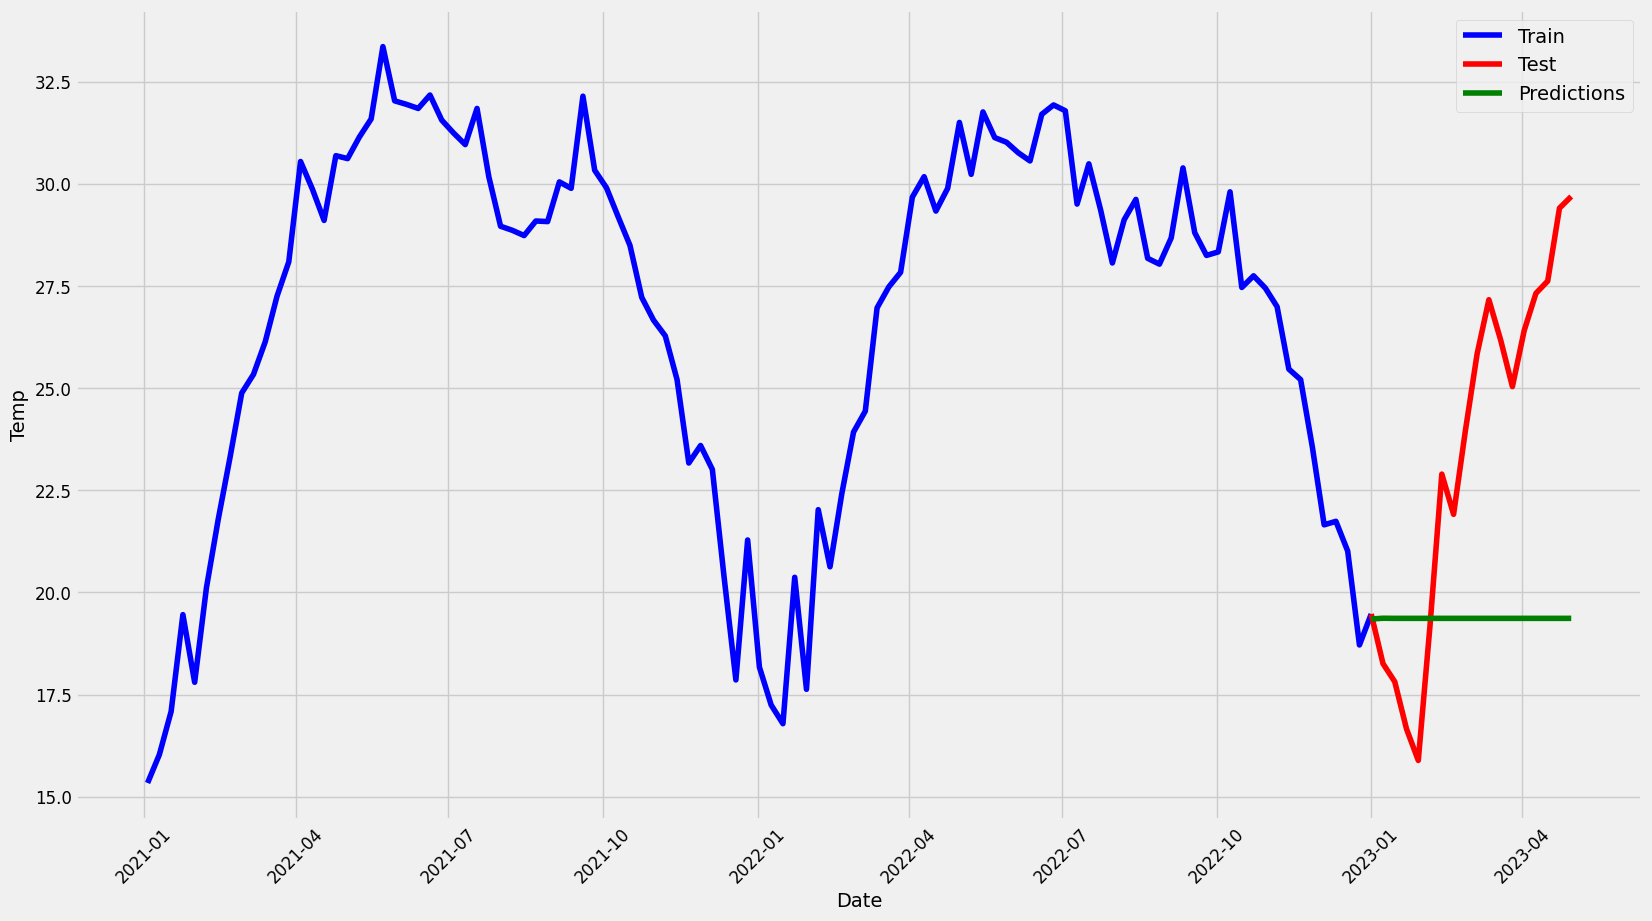

RMSE:  5.934271561420573


In [47]:
ARIMAmodel = ARIMA(train_set, order = (1, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [48]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -182.796
Date:                Mon, 11 Dec 2023   AIC                            369.592
Time:                        18:28:39   BIC                            374.881
Sample:                    01-03-2021   HQIC                           371.735
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1613      0.083     -1.944      0.052      -0.324       0.001
sigma2         1.9683      0.289      6.803      0.000       1.401       2.535
Ljung-Box (L1) (Q):                   0.09   Jarque-


#### Considering the graphs and RMSE (Root Mean Square Error) values, the ARIMA model with an order of (1, 0, 1) stands out as the most precise, evidenced by its minimal RMSE of 5.334. Another notable model is the one with an order of (2, 1, 2), which achieves a commendable RMSE of 8.493. However, it's worth noting that this model requires differencing the time series once, which might lead to a loss of some information. In contrast, the model with an order of (1, 1, 0) shows a slightly higher RMSE of 5.934, suggesting it could also be a strong contender for accurate predictions. In ARIMA model analysis, an RMSE of 5.33 indicates that the model's forecasts, on average, vary from the actual figures by about 5.33 units. Generally, a model with a lower RMSE is considered more accurate as it indicates predictions that are closer to real values, whereas a higher RMSE points to less precision and larger discrepancies between predictions and actual figures. Thus, the ARIMA model with an order of (1, 0, 1) is identified as the most accurate among the ones mentioned.

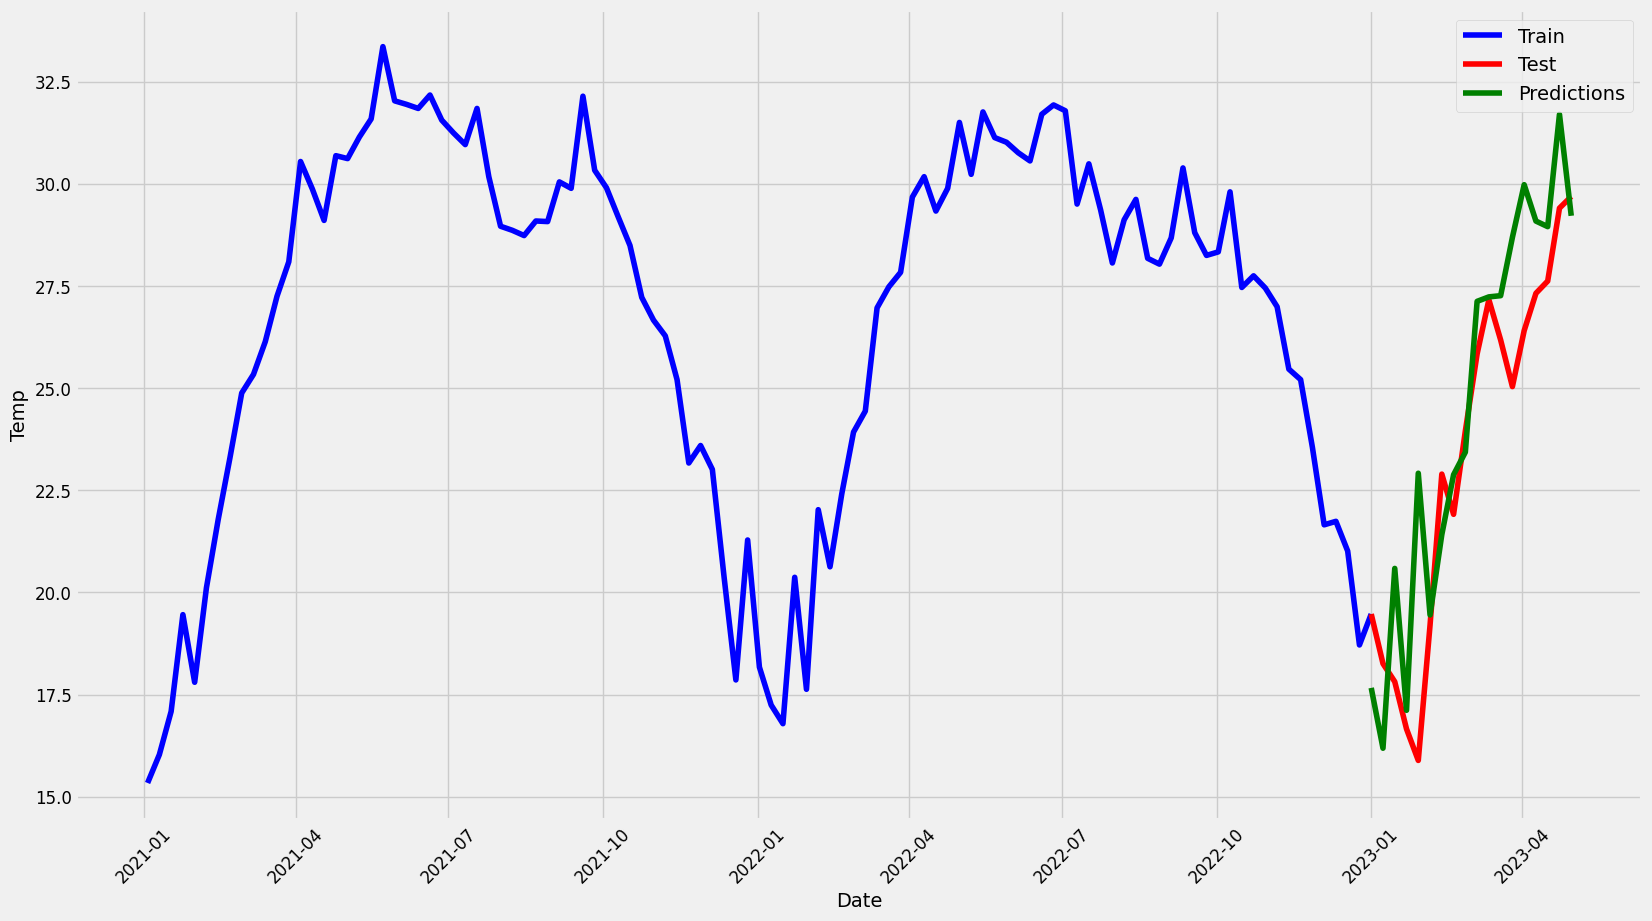

RMSE:  2.4476770754735298


In [49]:
#Q5

SARIMAXmodel = SARIMAX(train_set,order=(0, 1, 1),seasonal_order=(1, 1, 0, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [50]:
print(SARIMAXmodel.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                temp   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood                 -87.453
Date:                             Mon, 11 Dec 2023   AIC                            180.907
Time:                                     18:28:45   BIC                            186.761
Sample:                                 01-03-2021   HQIC                           183.151
                                      - 01-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8381      0.072    -11.693      0.000      -0.979      -0.698
ar.S.L52       0.6745   136

#### We thoroughly integrated all key elements of the ARIMA model, encompassing the orders for trend autoregression, trend differencing, and trend moving average. For the seasonal components, our focus was primarily on the autoregressive and differencing orders. A detailed examination of the plot clearly demonstrates that the SARIMA model effectively grasped both the overall trend and seasonality present in the temperature data. This success is evident in how closely the green line follows the red line in most parts of the plot, indicating the model's capability to handle variations and noise within the dataset. The SARIMA model, when applied to the weather data, showed a root mean square error (RMSE) of 2.44. This low RMSE value signifies that the model's forecasts on average differed from the actual temperature readings by roughly 2.44 units. A smaller RMSE is an indicator of higher accuracy, denoting a strong correlation between the model's predictions and the actual data. Therefore, it can be concluded that the SARIMA model is highly effective in capturing temperature patterns and variations, making it a reliable tool for future temperature predictions.

In [51]:
#Q6

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(train_set,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:984.8420684895568
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:794.8740753564534
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:607.5559163040955
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:484.26129484163187
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:618.3647982926846
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:579.2381552678194
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:519.5308452383847
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:494.75781851835586
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:849.1082414922065
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:678.1478903092462
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:515.6741383131671
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:414.7127223370434
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:536.2241434875908
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:494.81236165969034
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:451.8989129707915
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:416.7126464621739
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:367.56405761422843
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:323.52568636255825
ARIMA

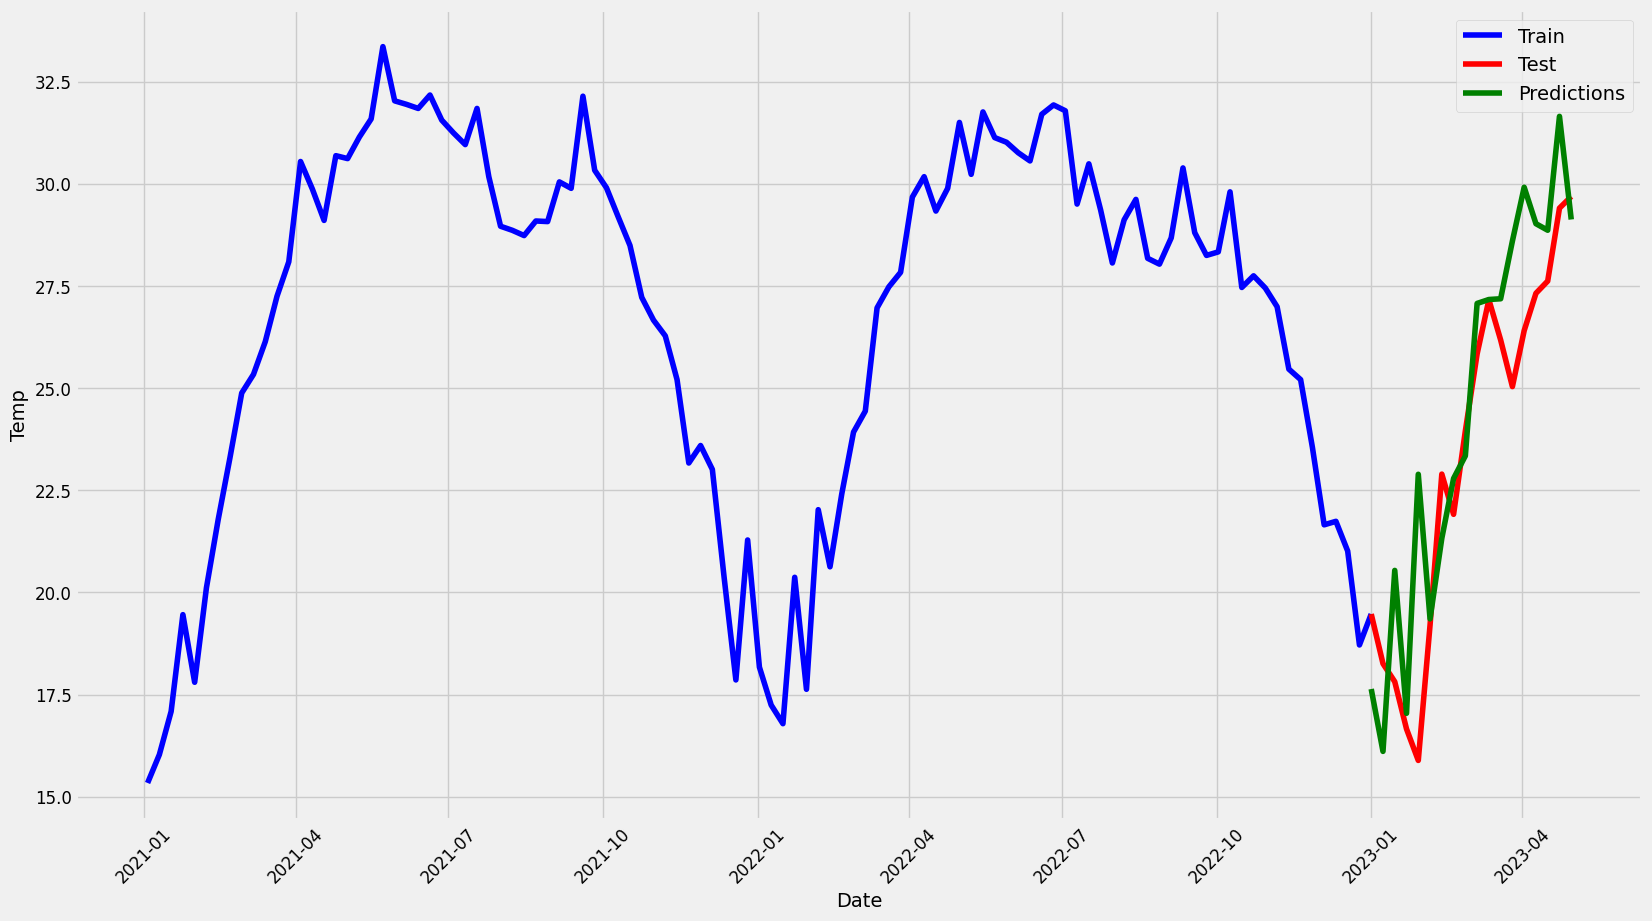

RMSE:  2.4241774326911796


In [52]:
SARIMAXmodel = SARIMAX(train_set,order=(1, 1, 1),seasonal_order=(1, 1, 1, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

#### The recent adjustments made to the SARIMA model parameters have resulted in performance that closely mirrors that of the previous SARIMAX model, as evidenced by an almost identical RMSE of 2.424. The primary change was the addition of the moving average order, which appears to have a negligible effect on the predictions for the current dataset. When comparing the efficacy of both the ARIMA and SARIMA models on this dataset, it's evident that the SARIMA model surpasses the ARIMA model. This superiority is highlighted by the notably lower RMSE value of the SARIMA model. A lower RMSE denotes more accurate forecasting, which is visually confirmed by the tight correlation between the green line (representing predictions) and the red line (representing actual data) in the SARIMA model's graphical output, unlike what is observed with the ARIMA model. Thus, we can deduce that the SARIMA model is more aptly suited for analyzing temperature data and offers more precise temperature forecasts.

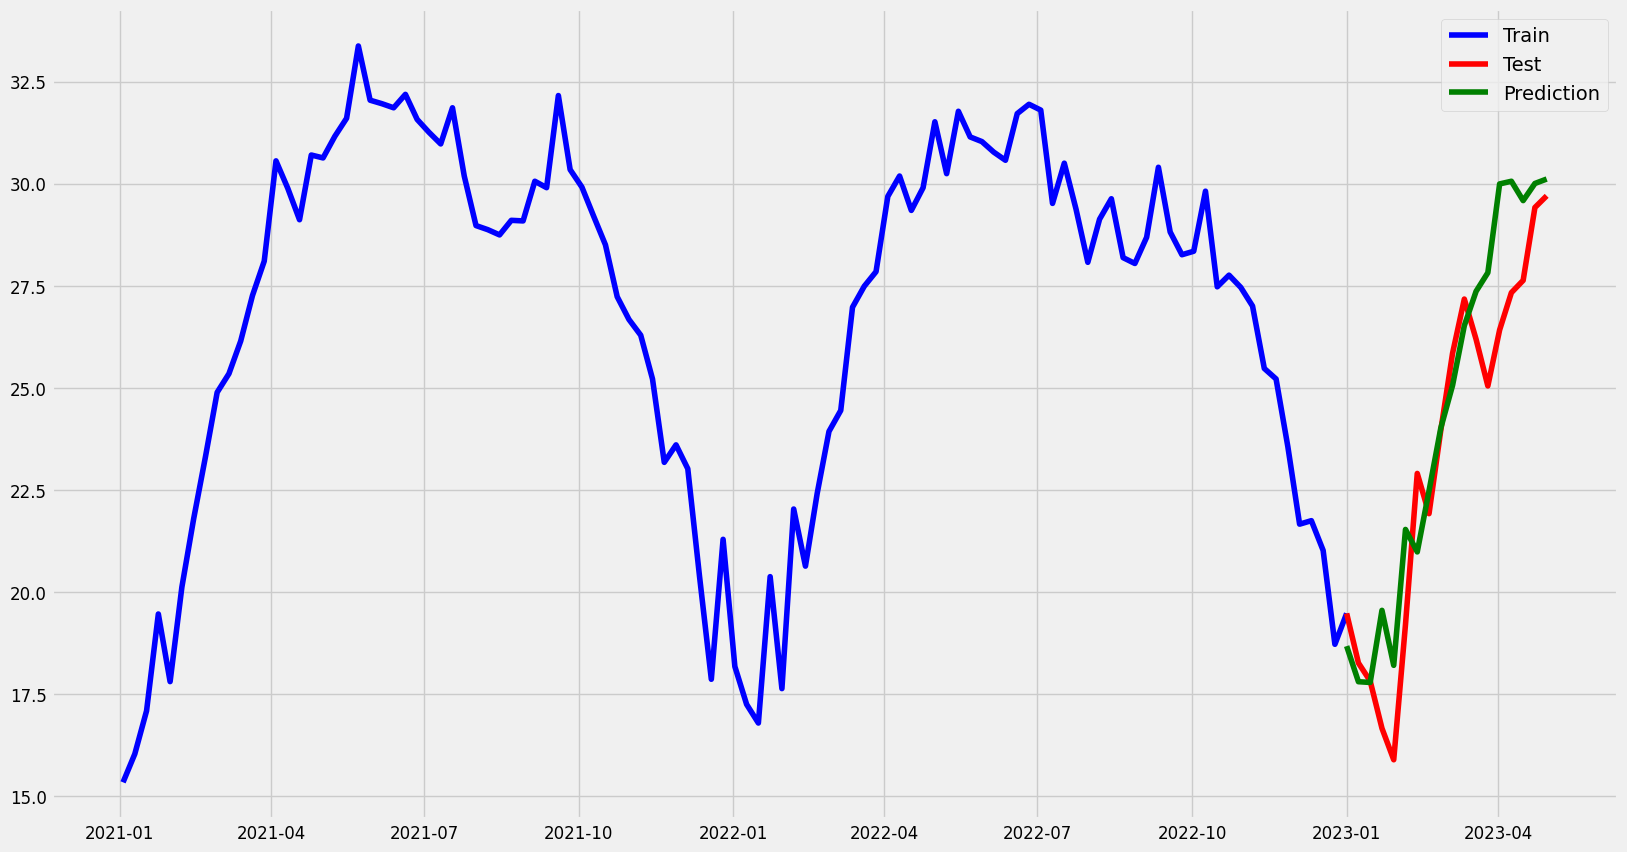

RMSE:  1.805678724422684


In [53]:
#Q7

months = [x.month for x in train_set.index]
years = [x.year for x in train_set.index]
day = [x.day for x in train_set.index]
trainX = np.array([day, months, years]).T
trainY = train_set.values

tmonths = [x.month for x in test_set.index]
tyears = [x.year for x in test_set.index]
tday = [x.day for x in test_set.index]
testX = np.array([tday, tmonths, tyears]).T
testY = test_set.values

rfmodel = RandomForestRegressor()
rfmodel.fit(trainX,trainY)

preds = rfmodel.predict(testX)
plt.plot(train_set.index, train_set.values,color="blue", label='Train')
plt.plot(test_set.index, test_set.values,color="red", label='Test')
plt.plot(test_set.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test_set.values, preds))
print("RMSE: ",rf_rmse)

#### A value of 1.8 reflects that the model's predictions, on average, differ from the actual test values by 1.8 units. This close approximation is visually confirmed in the model's graphical representation, where the green line, representing the predictions, aligns closely with the red line, which represents the actual test data. Such a close match between the predicted and actual values indicates that the regression model is functioning efficiently, producing precise forecasts.








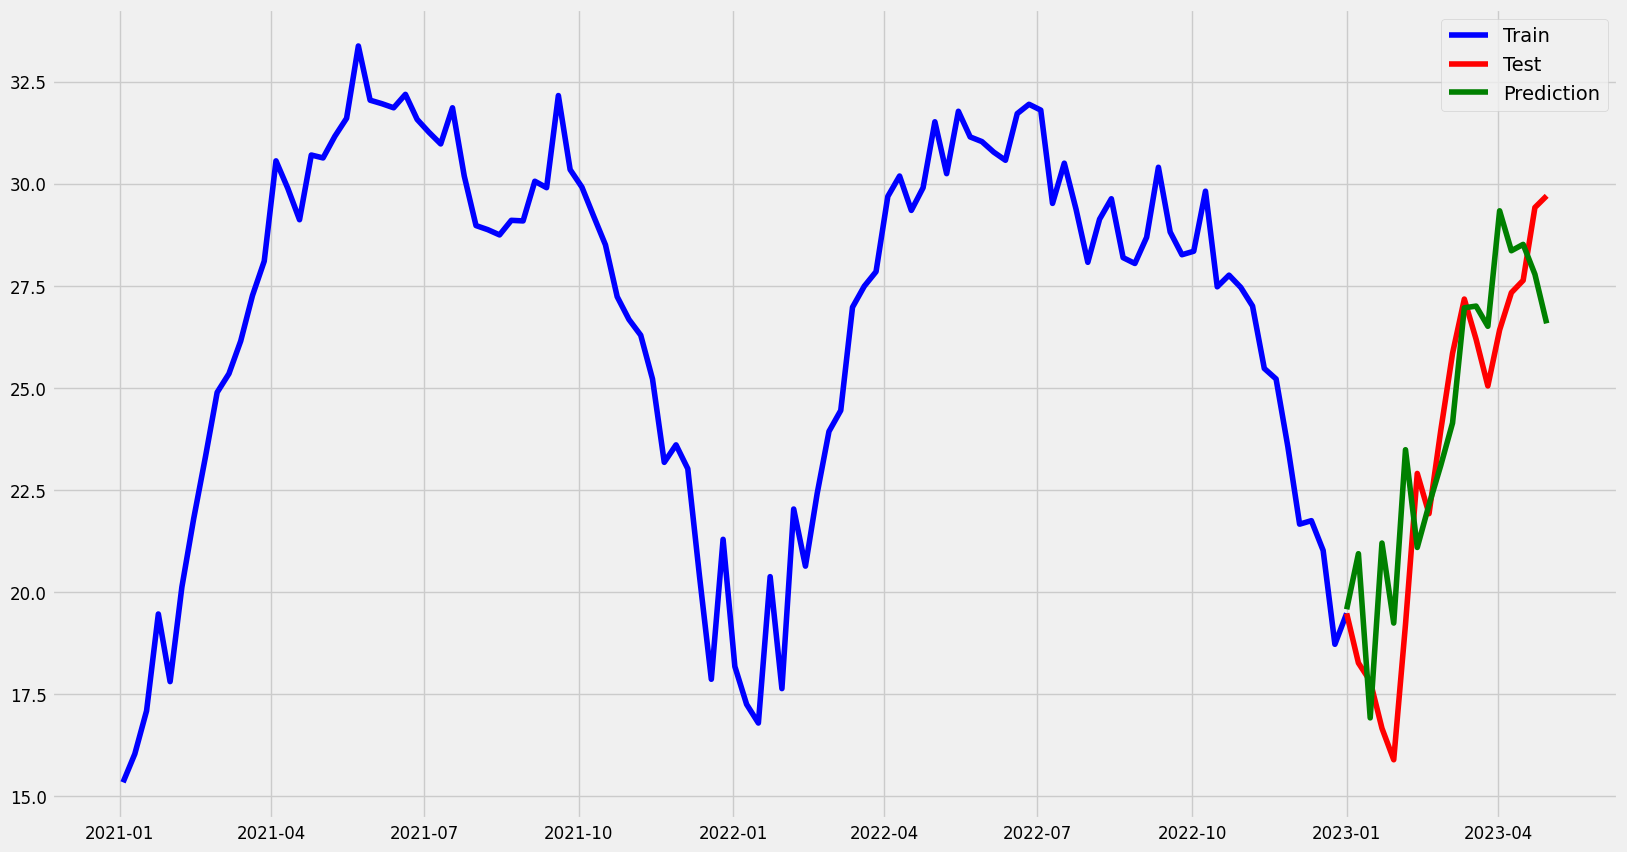

RMSE:  2.2452497576659773


In [54]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(trainX, trainY)
preds = svr.predict(testX)
plt.plot(train_set.index, train_set.values,color="blue", label='Train')
plt.plot(test_set.index, test_set.values,color="red", label='Test')
plt.plot(test_set.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test_set.values, preds))
print("RMSE: ",rf_rmse)

#### A value of 2.25 suggests an average difference of 2.25 units between the forecasted values and the actual test data. The graphical representation of the model reveals slight discrepancies between the predictions and actual values at the beginning and end of the test dataset. Despite these variances, there is a notable alignment between the predicted and actual values in the middle portion of the dataset.

#Q8
######Support Vector Regression Model: This model displayed an impressive RMSE of 2.245, which is better than the RMSEs of ARIMA, SARIMA, and its previous versions. Random Forest Regression MODEL: It outperformed all other models with an RMSE of 1.803, the lowest among the group.  SARIMA MODEL: Registered an RMSE of 2.447.  ARIMA MODEL: Had the highest RMSE of 5.333, indicating less accuracy in its predictions compared to the others.
######From these values, it's clear that the Random Forest regressor is the most effective, with the lowest RMSE and a strong correlation between its predictions and the actual data, as seen in the visualizations. Both the SARIMA and Support Vector models have similar RMSE values, indicating that either could be a viable option. On the other hand, the ARIMA model, with its considerably higher RMSE and visible prediction deviations, ranks as the least effective among the four. Therefore, in terms of RMSE values, the Random Forest and Support Vector models are the top choices for this particular dataset. However, it's important to balance other factors such as computational complexity and interpretability when deciding on the most appropriate model for a given situation.

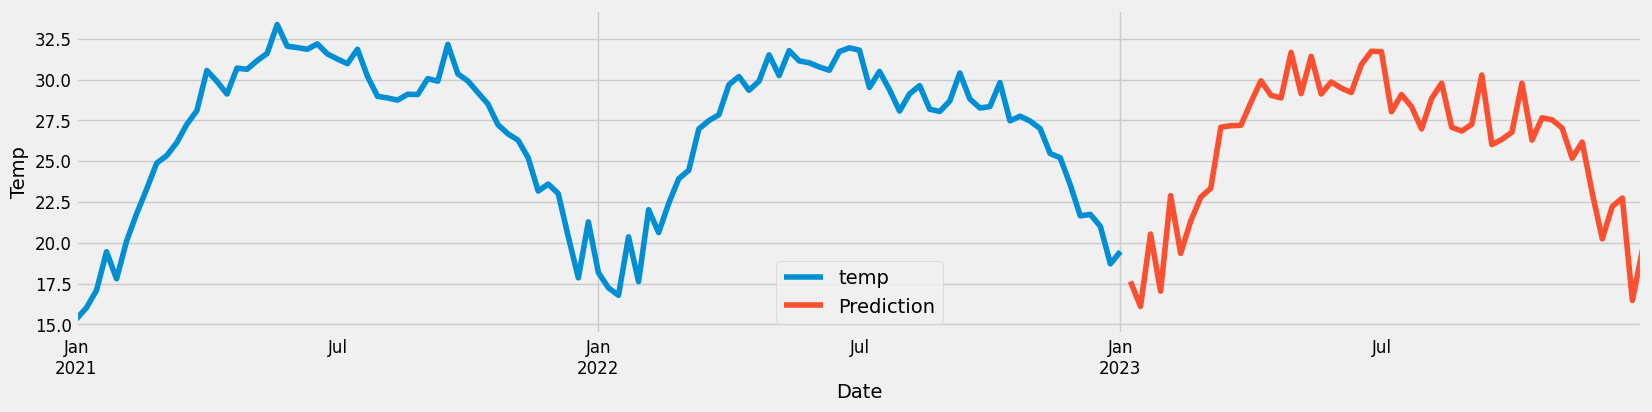

In [55]:
#Q9

start_date = '01/04/2023'
end_date = '31/12/2023'
future_dates = pd.date_range(start=start_date, end=end_date, freq='W')
train = weekly_mean[weekly_mean.index <= pd.to_datetime("2023-04-01", format='%Y-%m-%d')]
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 52)
SARIMAXmodel = SARIMAX(train_set, order=order, seasonal_order=seasonal_order)
SARIMAXfit = SARIMAXmodel.fit()
pred_u = SARIMAXfit.get_forecast(steps=len(future_dates))
pred_c = pred_u.conf_int()
ax = train_set.plot(label='Observed', figsize=(18, 4))
pred_u.predicted_mean.plot(ax=ax, label='Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Temp')
plt.legend()
plt.show()

In [56]:
#Q10

pred_mean = pred_u.predicted_mean
forecast_da = pd.DataFrame({'date': future_dates, 'temp_Pre': pred_mean.values,})
forecast_da.set_index('date', inplace=True)
res = forecast_da[forecast_da.index >= pd.to_datetime("2023-04-01", format='%Y-%m-%d')]
print(res)

             temp_Pre
date                 
2023-04-02  28.609293
2023-04-09  29.926281
2023-04-16  29.033608
2023-04-23  28.873395
2023-04-30  31.663347
2023-05-07  29.136546
2023-05-14  31.422327
2023-05-21  29.119925
2023-05-28  29.852518
2023-06-04  29.475816
2023-06-11  29.206073
2023-06-18  30.916836
2023-06-25  31.733241
2023-07-02  31.709943
2023-07-09  28.029371
2023-07-16  29.084828
2023-07-23  28.334861
2023-07-30  26.975081
2023-08-06  28.839249
2023-08-13  29.777633
2023-08-20  27.079403
2023-08-27  26.846877
2023-09-03  27.260579
2023-09-10  30.280054
2023-09-17  26.014218
2023-09-24  26.333845
2023-10-01  26.778236
2023-10-08  29.774045
2023-10-15  26.285411
2023-10-22  27.657122
2023-10-29  27.536461
2023-11-05  27.029502
2023-11-12  25.182105
2023-11-19  26.170372
2023-11-26  23.058592
2023-12-03  20.241963
2023-12-10  22.230774
2023-12-17  22.745944
2023-12-24  16.475479
2023-12-31  19.563913


In [57]:
months = [x.month for x in train_set.index]
years = [x.year for x in train_set.index]
day = [x.day for x in train_set.index]
trainX2 = np.array([day, months, years]).T
trainY2 = train_set.values

tmonths = [x.month for x in test_set.index]
tyears = [x.year for x in test_set.index]
tday = [x.day for x in test_set.index]
testX2 = np.array([tday, tmonths, tyears]).T
testY2 = test_set.values
rfmodel = RandomForestRegressor()
rfmodel.fit(trainX2,trainY2)

pre = rfmodel.predict(testX2)
pre = pd.Series(pre)
print(pre)

0     18.897000
1     17.677524
2     17.655000
3     19.790000
4     18.305143
5     21.453714
6     21.051000
7     22.634143
8     23.776143
9     24.920286
10    26.358429
11    27.334143
12    27.783000
13    29.886000
14    30.063429
15    29.555857
16    29.963286
17    30.122714
dtype: float64


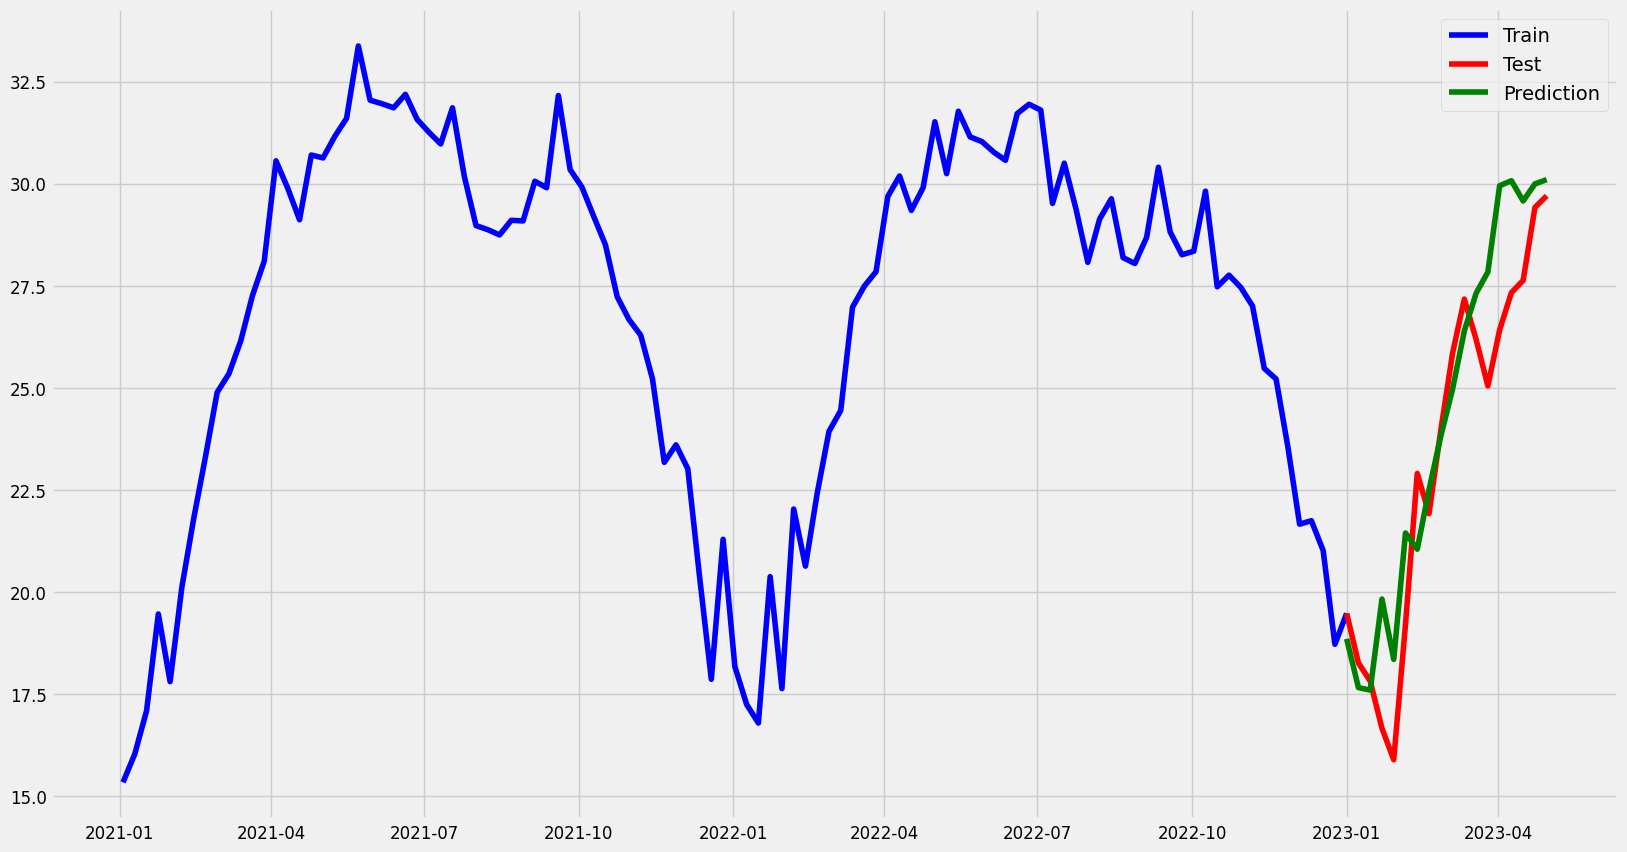

RMSE:  2.2452497576659773


In [58]:
#Q11

plt.plot(train_set.index, train_set.values,color="blue", label='Train')
plt.plot(test_set.index, test_set.values,color="red", label='Test')
plt.plot(test_set.index, pred, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test_set.values, preds))
print("RMSE: ",rf_rmse)

#### A value of 2.245 points to an average discrepancy of 2.245 units between the predicted and actual values. This level of error exceeds the RMSE seen in the Random Forest Regressor when it was applied to the original test dataset. From this observation, it can be inferred that while the Random Forest Regressor showed strong performance on the original dataset, its efficiency appears to be slightly reduced when utilized on the forecasted dataset.